In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV,HalvingGridSearchCV
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/sazzad15-1779/Datasets/master/heart%20failure%20prediction/heart_failure_clinical_records_dataset.csv")
data


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
for i in data.columns:
  if data[i].nunique() <3:
    print("column:",i,"\n",data[i].unique())

column: anaemia 
 [0 1]
column: diabetes 
 [0 1]
column: high_blood_pressure 
 [1 0]
column: sex 
 [1 0]
column: smoking 
 [0 1]
column: DEATH_EVENT 
 [1 0]


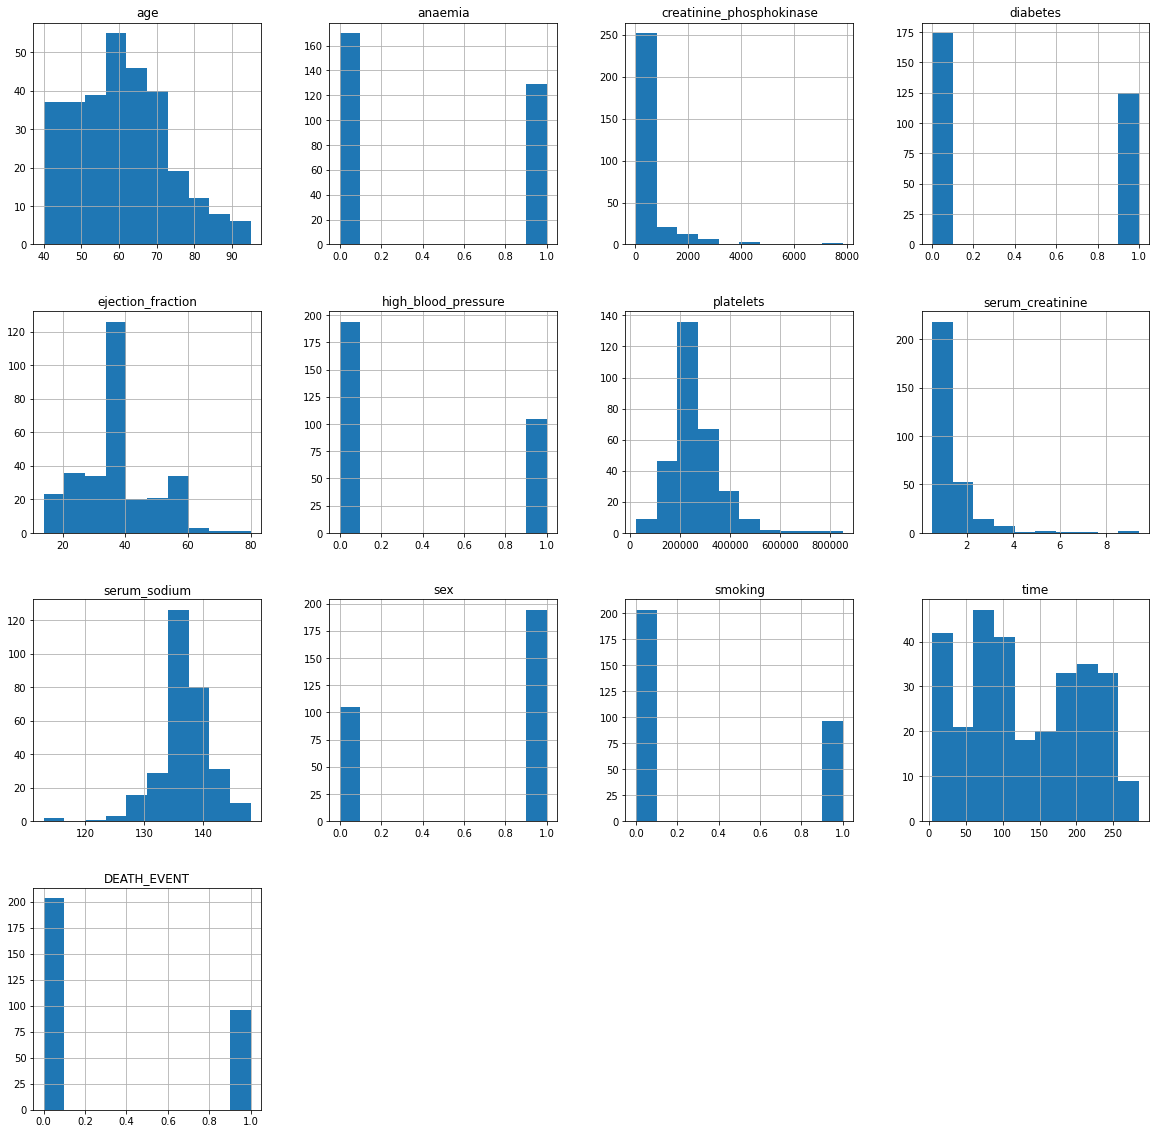

In [6]:
his_new=data.hist(figsize=(20,20))

In [7]:
plt.figure(figsize=(12,10))
fig = sns.heatmap(data=round(data.corr(),2), annot=True, annot_kws={"fontsize":13})
plt.show()

NameError: ignored

In [ ]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(data,figsize=(25, 25))

#outlier detection

In [ ]:
p=sns.pairplot(data, hue = 'DEATH_EVENT')

In [ ]:
from scipy.stats import norm
sns.set()
plt.figure(figsize=(10,20))
for i ,  var in enumerate(data.columns):
  plt.subplot(10,2,i+1)
  sns.distplot(data[var],fit=norm,bins=20)

In [ ]:
sns.set()
plt.figure(figsize=(10,150))
for i ,  var in enumerate(data.columns):
  plt.subplot(40,1,i+1)
  sns.scatterplot(x=data[var] , y=data['DEATH_EVENT'], alpha=0.25)

#outlier treatment

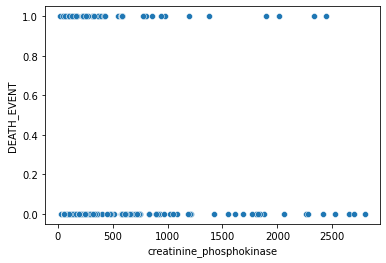

In [8]:
data.drop(data[data.creatinine_phosphokinase>3000].index,axis=0,inplace=True)
sns.scatterplot(x=data.creatinine_phosphokinase,y=data.DEATH_EVENT)

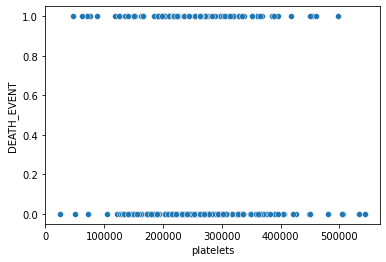

In [9]:
data.drop(data[data.platelets>600000].index,axis=0,inplace=True)
sns.scatterplot(x=data.platelets,y=data.DEATH_EVENT)

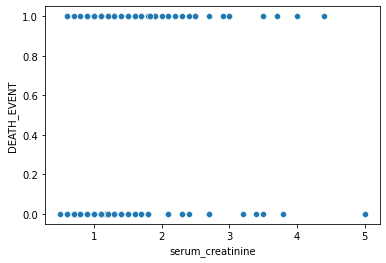

In [10]:
data.drop(data[data.serum_creatinine>5].index,axis=0,inplace=True)
sns.scatterplot(x=data.serum_creatinine,y=data.DEATH_EVENT)

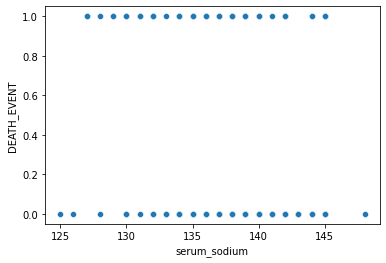

In [11]:
data.drop(data[data.serum_sodium<125].index,axis=0,inplace=True)
sns.scatterplot(x=data.serum_sodium,y=data.DEATH_EVENT)

# dataset splitting

In [12]:
y = data.DEATH_EVENT
x = data.drop('DEATH_EVENT',axis=1,inplace=False)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=43)

# numerical value standerdization

In [15]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler,StandardScaler

In [16]:
scaler = StandardScaler().fit(X_train)
X_train_std_scl = scaler.transform(X_train)
X_test_std_scl = scaler.transform(X_test)

In [17]:
X_train_std_scl.shape,X_test_std_scl.shape,y_train.shape,y_test.shape

((210, 12), (71, 12), (210,), (71,))

#model create

In [18]:
classifiers = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Support Vector Machines' : SVC(),
    'K-nearest Neighbors' : KNeighborsClassifier(),
    'XGBoost' : XGBClassifier(),
    'LGBBoost':LGBMClassifier()

}

In [19]:
results=pd.DataFrame(columns=['Accuracy in %','F1-score'])
for method,func in classifiers.items():
    func.fit(X_train_std_scl,y_train)
    pred = func.predict(X_test_std_scl)
    results.loc[method]= [100*np.round(accuracy_score(y_test,pred),decimals=4),
                         round(f1_score(y_test,pred),2)]
results

,Accuracy in %,F1-score
Logistic Regression,74.65,0.59
Decision Tree,80.28,0.71
Random Forest,81.69,0.70
Support Vector Machines,76.06,0.59
K-nearest Neighbors,74.65,0.44
XGBoost,81.69,0.70
LGBBoost,81.69,0.70


#Ann model

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
X_train_, X_val, y_train_, y_val = train_test_split(X_train_std_scl,y_train,test_size=0.20)

In [24]:
model = Sequential()
model.add(Dense(12,activation='relu'))
model.add(Dense(50,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics = ["accuracy"])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

model.fit(x=X_train_,y=y_train_,
          validation_data=(X_val,y_val.values),
          batch_size=100,epochs=150,callbacks=[early_stop])

Epoch 1/150
2/2 [==============================] - 1s 199ms/step - loss: 0.6528 - accuracy: 0.7083 - val_loss: 0.6511 - val_accuracy: 0.6905
Epoch 2/150
2/2 [==============================] - 0s 23ms/step - loss: 0.6460 - accuracy: 0.7083 - val_loss: 0.6460 - val_accuracy: 0.6905
Epoch 3/150
2/2 [==============================] - 0s 23ms/step - loss: 0.6371 - accuracy: 0.7083 - val_loss: 0.6414 - val_accuracy: 0.6905
Epoch 4/150
2/2 [==============================] - 0s 27ms/step - loss: 0.6318 - accuracy: 0.7083 - val_loss: 0.6369 - val_accuracy: 0.6905
Epoch 5/150
2/2 [==============================] - 0s 24ms/step - loss: 0.6265 - accuracy: 0.7083 - val_loss: 0.6323 - val_accuracy: 0.6905
Epoch 6/150
2/2 [==============================] - 0s 24ms/step - loss: 0.6216 - accuracy: 0.7083 - val_loss: 0.6276 - val_accuracy: 0.6905
Epoch 7/150
2/2 [==============================] - 0s 24ms/step - loss: 0.6120 - accuracy: 0.7083 - val_loss: 0.6229 - val_accuracy: 0.6905
Epoch 8/150
2/2 [==

In [25]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

3/3 [==============================] - 0s 4ms/step - loss: 36776.6172 - accuracy: 0.6761
Test score: 36776.6171875
Test accuracy: 0.6760563254356384


#### randomforest hypertune

In [26]:
random_grid = {'n_estimators':  [100,200,300],
               'max_features': ['auto', 'sqrt','log2'],
               'max_depth': [10,100,700],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1,2, 5]}
             
rf_cl=RandomForestClassifier()
rand_halv = HalvingGridSearchCV(
    rf_cl, random_grid, scoring="roc_auc", n_jobs=-1,factor=3
)
rand_halv_h= rand_halv.fit(X_train_std_scl, y_train)

In [27]:
print(rand_halv_h.best_params_)
print(rand_halv_h.best_estimator_)
print(rand_halv_h.best_score_)

{'max_depth': 100, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}
RandomForestClassifier(max_depth=100, min_samples_leaf=5, min_samples_split=10)
0.9139907407407406


In [28]:
rand_halv_h.score(X_test_std_scl,y_test)

0.9021739130434783

# evaluating model

In [ ]:
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,132,35,167
1,39,50,89
All,171,85,256


Text(0.5, 15.0, 'Predicted label')

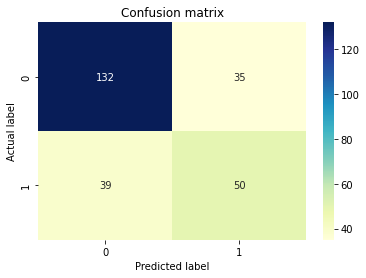

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# classify report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       167
           1       0.59      0.56      0.57        89

    accuracy                           0.71       256
   macro avg       0.68      0.68      0.68       256
weighted avg       0.71      0.71      0.71       256



In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

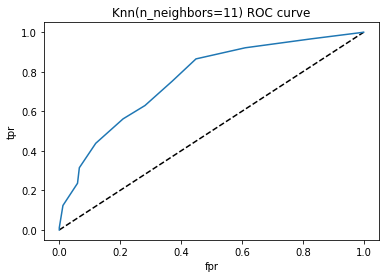

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7626993204602032